# Identifying Patient Cohorts in [MIMIC-II](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3124312/)


In [1]:
%matplotlib inline

In [4]:
import pymysql
import pandas as pd
import getpass
import pandas as pd
import seaborn as sns
import datetime
import time
import matplotlib.pyplot as plt

In [5]:
conn = pymysql.connect(host="mysql",
                       port=3306,user="jovyan",
                       passwd=getpass.getpass("Enter MySQL passwd for jovyan"),db='mimic2')
cursor = conn.cursor()

Enter MySQL passwd for jovyan········


In [10]:
 pd.read_sql("""SELECT * FROM admissions LIMIT 50""", conn).head()

,hadm_id,subject_id,admit_dt,disch_dt
0,28766,56,2644-01-17 00:00:00,2644-01-23 00:00:00
1,2075,3,2682-09-07 00:00:00,2682-09-18 00:00:00
2,20666,21,3138-10-29 00:00:00,3138-11-11 00:00:00
3,20882,21,3139-03-19 00:00:00,3139-03-28 00:00:00
4,12532,12,2875-09-26 00:00:00,2875-10-09 00:00:00


TypeError: 'numpy.int64' object is not callable

## Exercise: Create a Histogram of the length of stay for subjects in the database

In [16]:
hosps = \
pd.read_sql("""SELECT * FROM admissions""", conn)
print(hosps.shape)
hosps
hosps["LOS"] = hosps["disch_dt"] - hosps["admit_dt"]
hosps["LOS2"] = hosps.apply(lambda row: (row["disch_dt"]- row["admit_dt"]).total_seconds(), axis = 1)
hosps.head()

(5074, 4)


,hadm_id,subject_id,admit_dt,disch_dt,LOS,LOS2
0,28766,56,2644-01-17 00:00:00,2644-01-23 00:00:00,6 days,518400.0
1,2075,3,2682-09-07 00:00:00,2682-09-18 00:00:00,11 days,950400.0
2,20666,21,3138-10-29 00:00:00,3138-11-11 00:00:00,13 days,1123200.0
3,20882,21,3139-03-19 00:00:00,3139-03-28 00:00:00,9 days,777600.0
4,12532,12,2875-09-26 00:00:00,2875-10-09 00:00:00,13 days,1123200.0


In [17]:
hosps["LOS"][0]

Timedelta('6 days 00:00:00')

In [18]:
hosps["LOS2"].describe()

count    5.074000e+03
mean     1.008517e+06
std      1.165680e+06
min      0.000000e+00
25%      3.456000e+05
50%      6.912000e+05
75%      1.209600e+06
max      2.548800e+07
Name: LOS2, dtype: float64

In [19]:
hosps = \
pd.read_sql("""SELECT * FROM admissions""", conn)
print(hosps.shape)
hosps
hosps["LOS"] = hosps["disch_dt"] - hosps["admit_dt"]
hosps["LOS2"] = hosps.apply(lambda row: (row["disch_dt"]- row["admit_dt"]).total_seconds()/(24*3600), axis = 1)
hosps.head()

(5074, 4)


,hadm_id,subject_id,admit_dt,disch_dt,LOS,LOS2
0,28766,56,2644-01-17 00:00:00,2644-01-23 00:00:00,6 days,6.0
1,2075,3,2682-09-07 00:00:00,2682-09-18 00:00:00,11 days,11.0
2,20666,21,3138-10-29 00:00:00,3138-11-11 00:00:00,13 days,13.0
3,20882,21,3139-03-19 00:00:00,3139-03-28 00:00:00,9 days,9.0
4,12532,12,2875-09-26 00:00:00,2875-10-09 00:00:00,13 days,13.0


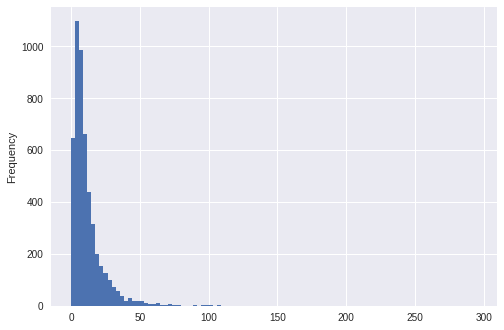

In [22]:
hosps["LOS2"].plot.hist(bins=100)

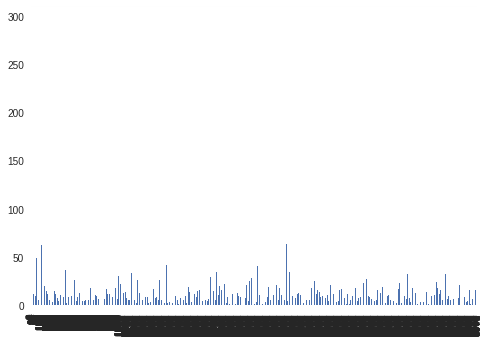

In [24]:
hosps["LOS2"].plot.bar()

## Exercise: Create a histogram of the day of the week when patients are admitted

In [25]:
admit1 = hosps["admit_dt"][0]
admit1.weekday()

2

In [27]:
hosps["day of week"] = hosps.apply(lambda r:r["admit_dt"].weekday(), axis =1)
hosps.head()

,hadm_id,subject_id,admit_dt,disch_dt,LOS,LOS2,day of week
0,28766,56,2644-01-17 00:00:00,2644-01-23 00:00:00,6 days,6.0,2
1,2075,3,2682-09-07 00:00:00,2682-09-18 00:00:00,11 days,11.0,3
2,20666,21,3138-10-29 00:00:00,3138-11-11 00:00:00,13 days,13.0,5
3,20882,21,3139-03-19 00:00:00,3139-03-28 00:00:00,9 days,9.0,6
4,12532,12,2875-09-26 00:00:00,2875-10-09 00:00:00,13 days,13.0,3


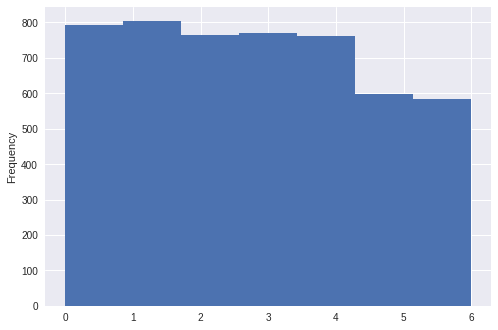

In [29]:
hosps["day of week"].plot.hist(bins=7)